# Visualizaciones - Dataset de Clima

Este notebook contiene visualizaciones del dataset para identificar patrones, tendencias y relaciones entre las variables:

- **Series temporales** de todas las variables climáticas
- **Análisis estacional** y de patrones cíclicos
- **Distribuciones** y histogramas de variables
- **Correlaciones** y relaciones entre variables
- **Análisis de outliers** visual
- **Comparación** entre datos de entrenamiento y prueba

## 1. Importación de librerías y carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurar el estilo de las visualizaciones
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Librerías importadas correctamente")

Librerías importadas correctamente


In [2]:
# Cargar los datos
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

# Convertir fechas
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

# Agregar características temporales
for df in [train_data, test_data]:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day_of_year'] = df['date'].dt.dayofyear
    df['weekday'] = df['date'].dt.dayofweek

print(f"Datos cargados: {len(train_data)} registros de entrenamiento, {len(test_data)} de prueba")

Datos cargados: 1462 registros de entrenamiento, 114 de prueba


## 2. Series Temporales - Variables Climáticas

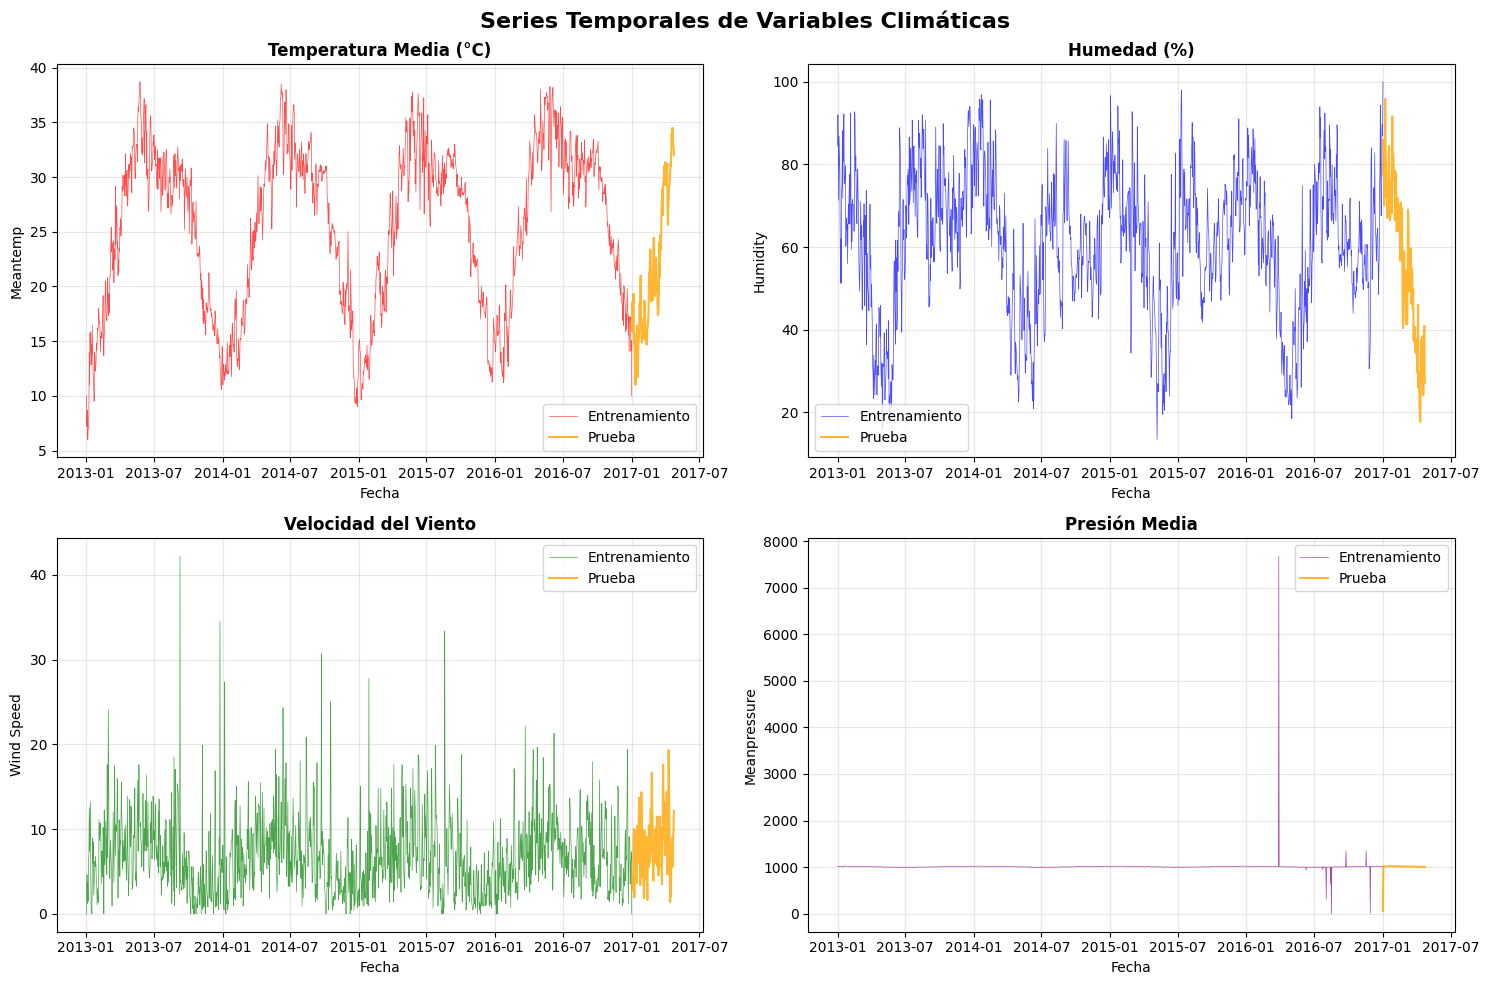

In [3]:
# Gráfico de series temporales de todas las variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Series Temporales de Variables Climáticas', fontsize=16, fontweight='bold')

variables = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
titles = ['Temperatura Media (°C)', 'Humedad (%)', 'Velocidad del Viento', 'Presión Media']
colors = ['red', 'blue', 'green', 'purple']

for i, (var, title, color) in enumerate(zip(variables, titles, colors)):
    row = i // 2
    col = i % 2
    
    # Plotear datos de entrenamiento
    axes[row, col].plot(train_data['date'], train_data[var], 
                       color=color, alpha=0.7, linewidth=0.5, label='Entrenamiento')
    
    # Plotear datos de prueba
    axes[row, col].plot(test_data['date'], test_data[var], 
                       color='orange', alpha=0.8, linewidth=1.5, label='Prueba')
    
    axes[row, col].set_title(title, fontweight='bold')
    axes[row, col].set_xlabel('Fecha')
    axes[row, col].set_ylabel(var.replace('_', ' ').title())
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Análisis Estacional

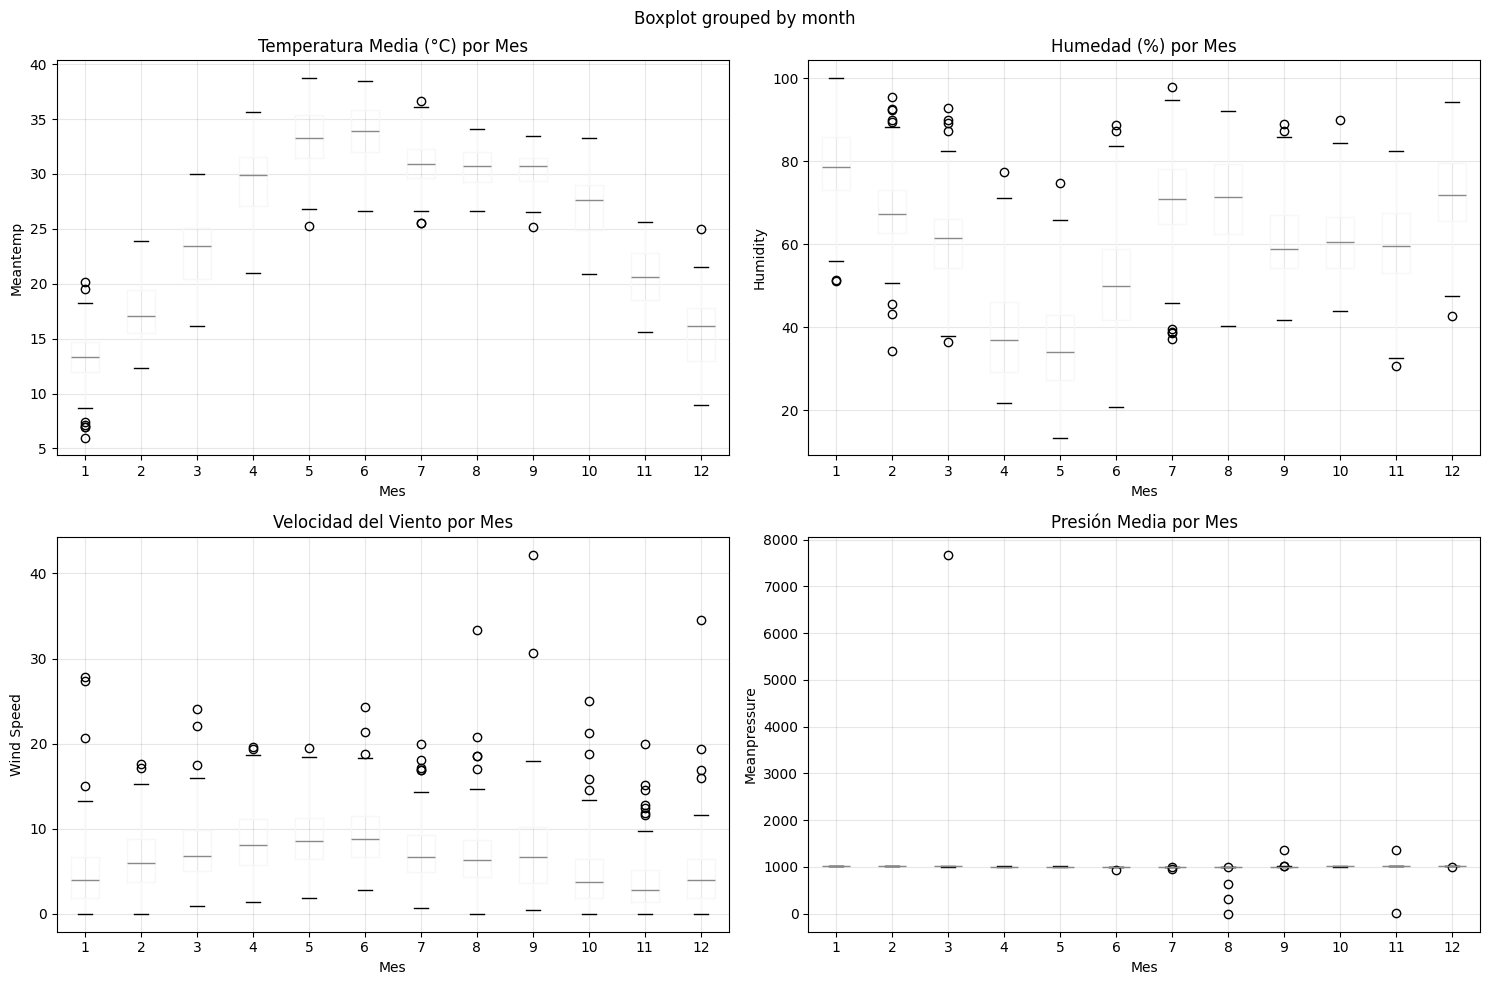

=== ESTADÍSTICAS MENSUALES DE TEMPERATURA ===
        mean   std
month             
1      13.31  2.47
2      17.62  2.92
3      22.91  3.26
4      29.38  3.01
5      33.32  2.79
6      33.73  2.70
7      31.00  2.19
8      30.60  1.78
9      30.43  1.51
10     27.11  2.64
11     20.66  2.43
12     15.67  3.13


In [4]:
# Análisis por mes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Patrones Estacionales por Mes', fontsize=16, fontweight='bold')

# Calcular estadísticas mensuales
monthly_stats = train_data.groupby('month')[variables].agg(['mean', 'std']).round(2)

for i, (var, title, color) in enumerate(zip(variables, titles, colors)):
    row = i // 2
    col = i % 2
    
    # Box plot por mes
    train_data.boxplot(column=var, by='month', ax=axes[row, col])
    axes[row, col].set_title(f'{title} por Mes')
    axes[row, col].set_xlabel('Mes')
    axes[row, col].set_ylabel(var.replace('_', ' ').title())
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Mostrar estadísticas mensuales para temperatura
print("=== ESTADÍSTICAS MENSUALES DE TEMPERATURA ===")
print(monthly_stats['meantemp'])

## 4. Distribuciones de Variables

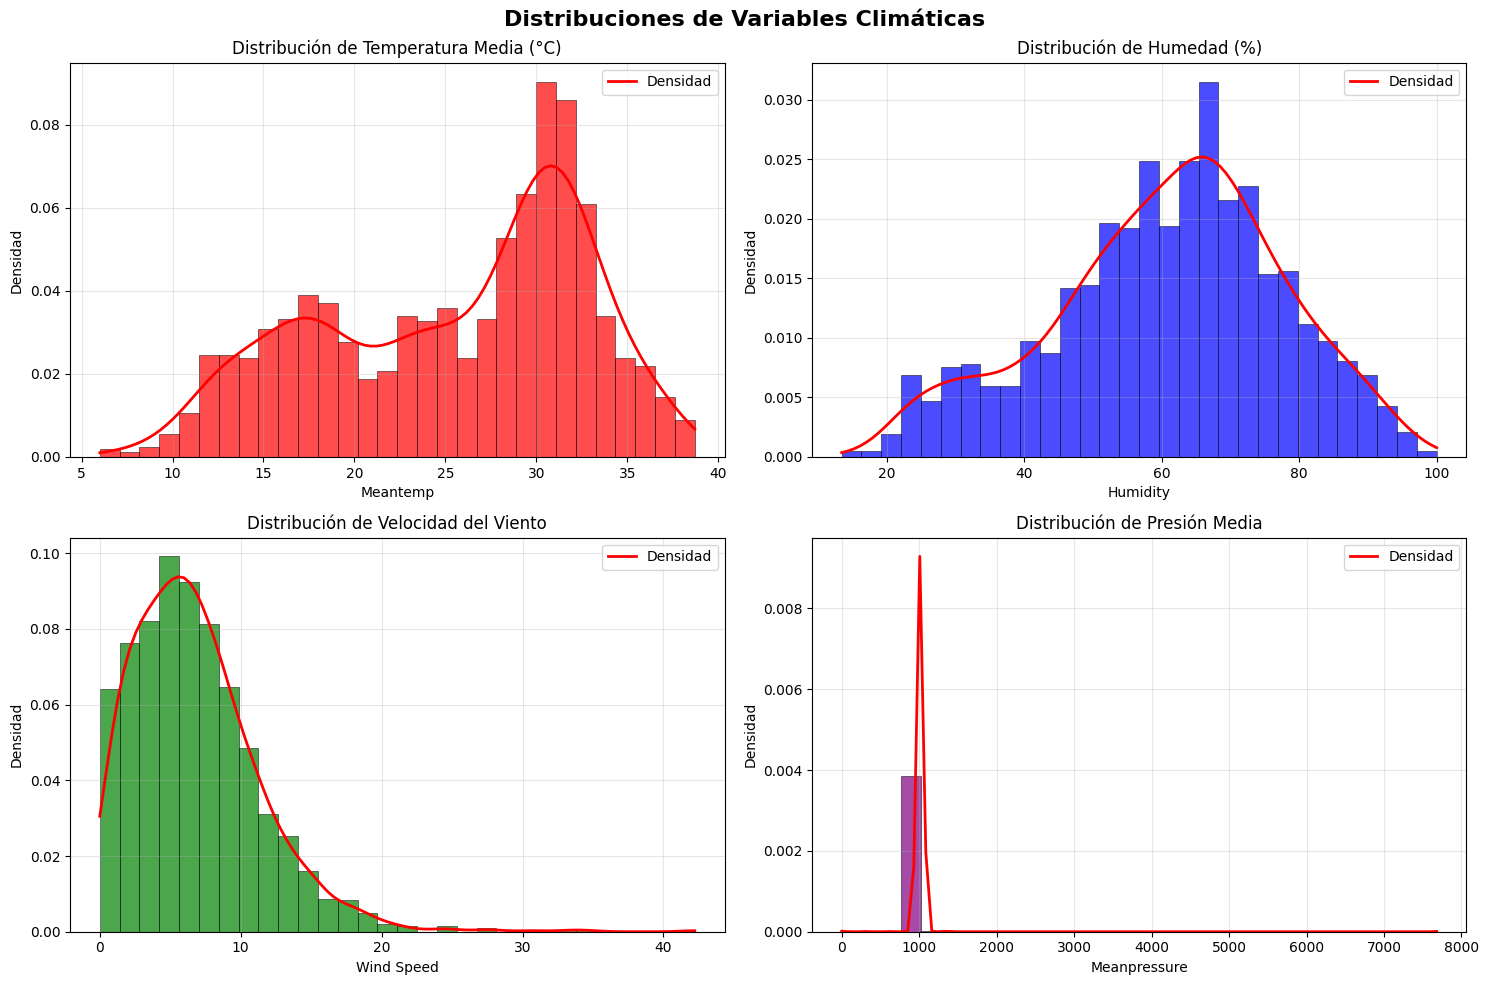

In [5]:
# Histogramas y distribuciones
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribuciones de Variables Climáticas', fontsize=16, fontweight='bold')

for i, (var, title, color) in enumerate(zip(variables, titles, colors)):
    row = i // 2
    col = i % 2
    
    # Histograma con curva de densidad
    axes[row, col].hist(train_data[var], bins=30, alpha=0.7, color=color, 
                       density=True, edgecolor='black', linewidth=0.5)
    
    # Curva de densidad
    from scipy import stats
    x = np.linspace(train_data[var].min(), train_data[var].max(), 100)
    kde = stats.gaussian_kde(train_data[var])
    axes[row, col].plot(x, kde(x), color='red', linewidth=2, label='Densidad')
    
    axes[row, col].set_title(f'Distribución de {title}')
    axes[row, col].set_xlabel(var.replace('_', ' ').title())
    axes[row, col].set_ylabel('Densidad')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Matriz de Correlación

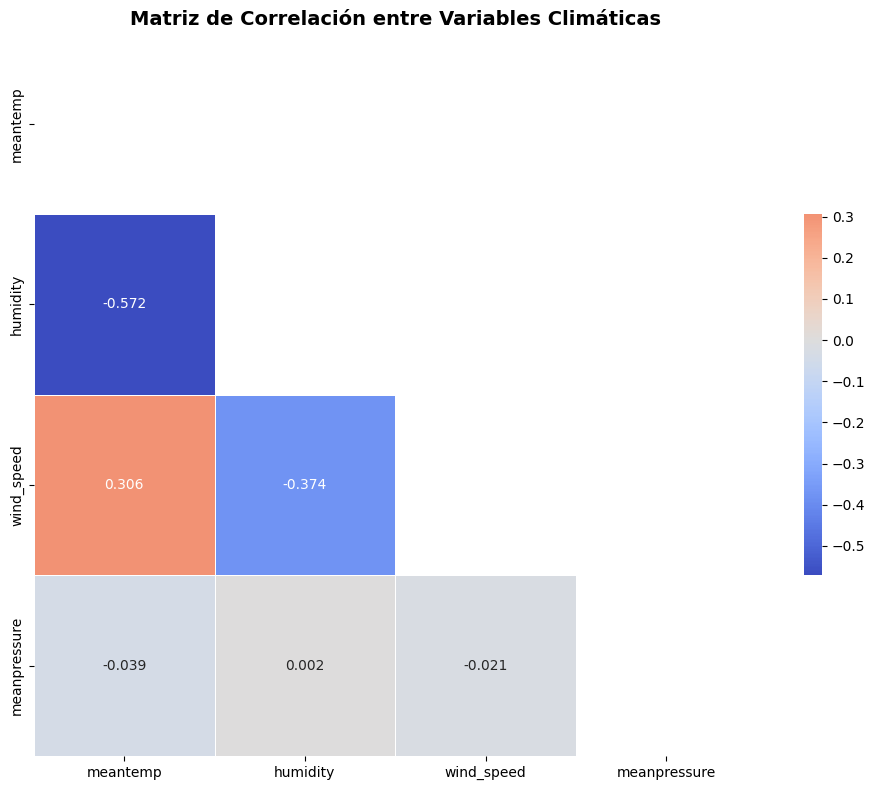

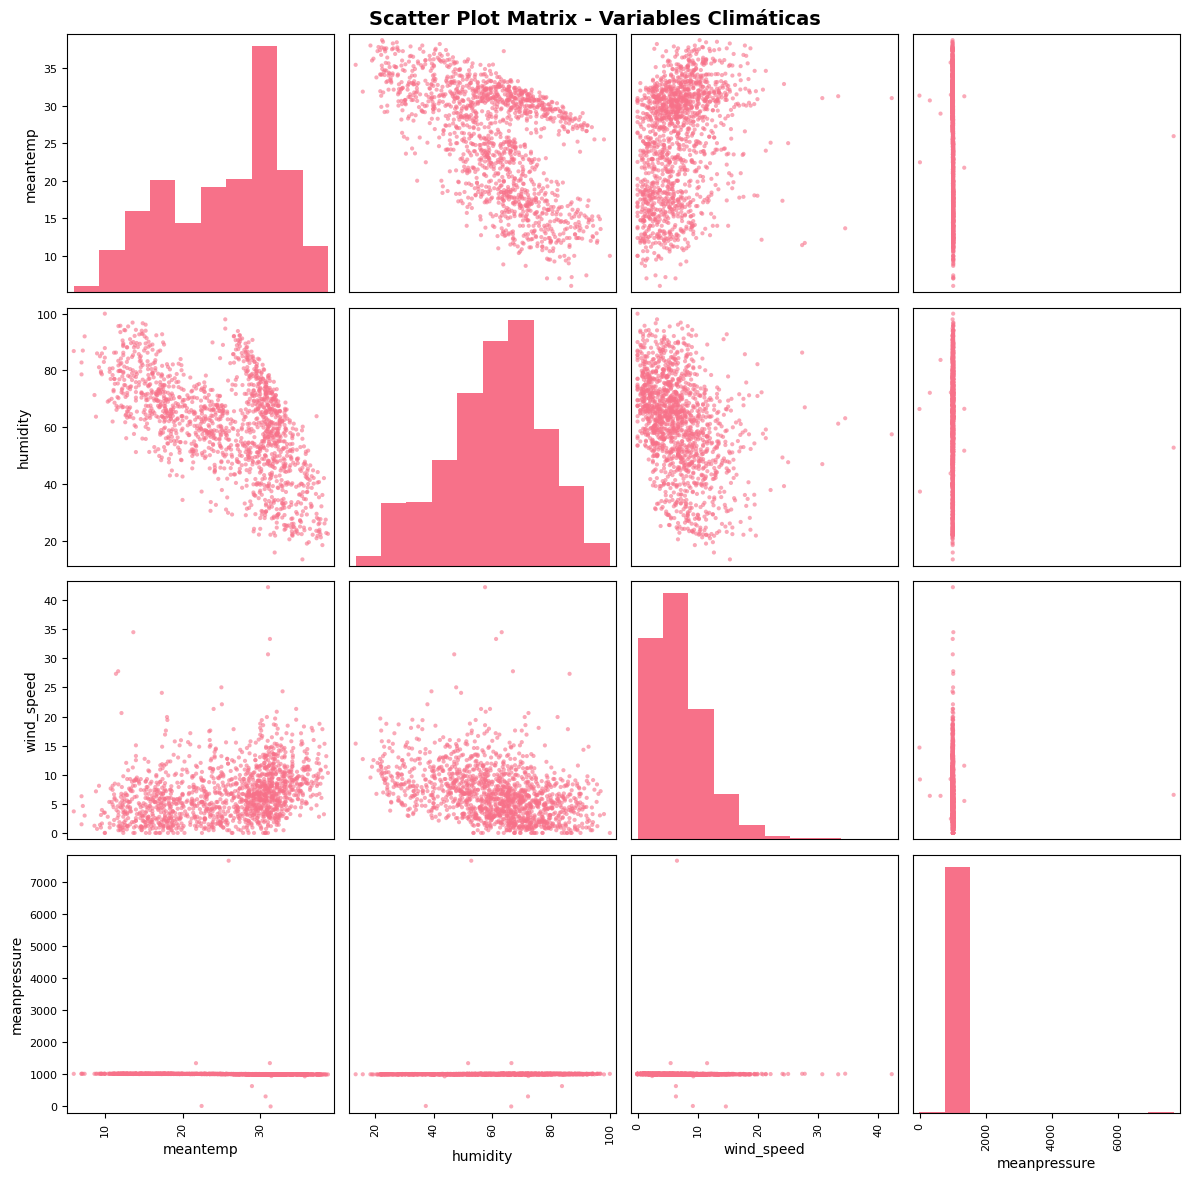

In [6]:
# Matriz de correlación
correlation_matrix = train_data[variables].corr()

# Heatmap de correlación
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
heatmap = sns.heatmap(correlation_matrix, 
                     mask=mask,
                     annot=True, 
                     cmap='coolwarm', 
                     center=0,
                     square=True, 
                     linewidths=0.5,
                     fmt='.3f',
                     cbar_kws={"shrink": 0.5})

plt.title('Matriz de Correlación entre Variables Climáticas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(train_data[variables], figsize=(12, 12), alpha=0.6, diagonal='hist')
plt.suptitle('Scatter Plot Matrix - Variables Climáticas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 6. Análisis de Outliers

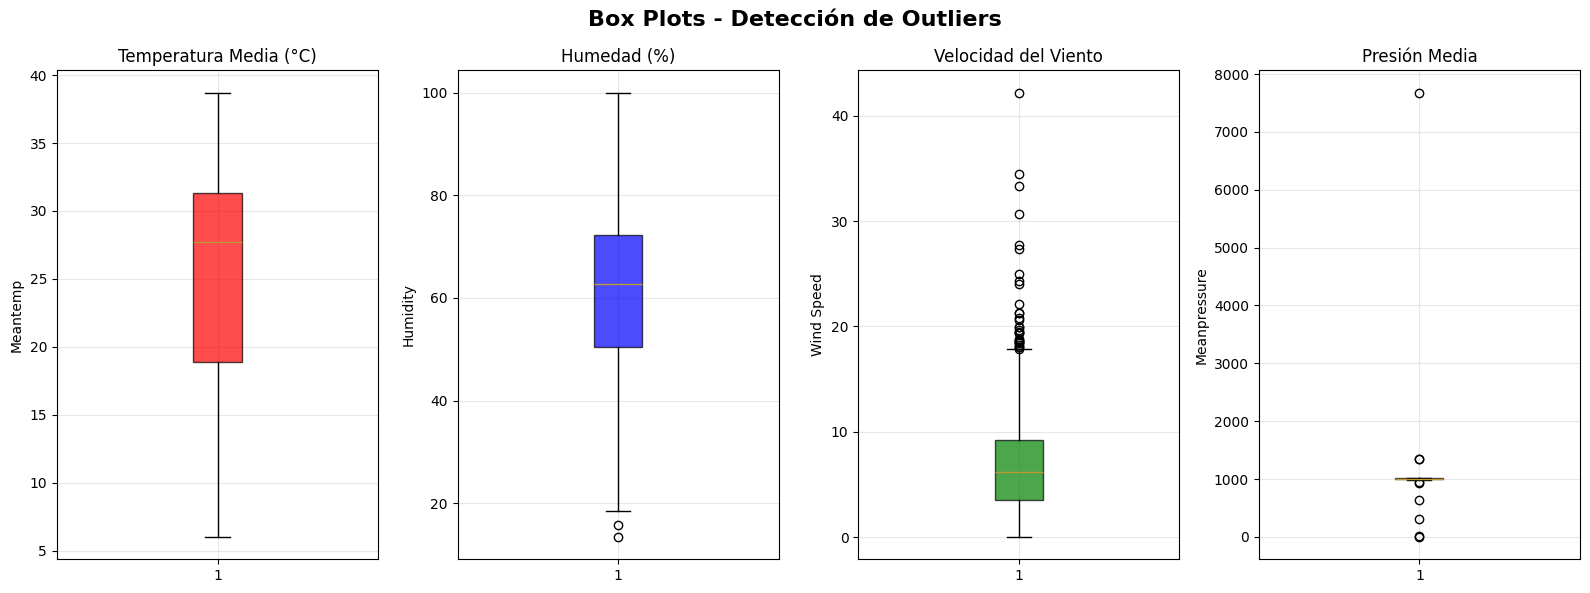

=== ANÁLISIS DE OUTLIERS (Método IQR) ===

MEANTEMP:
  Outliers detectados: 0 (0.0% del total)
  Rango normal: [0.18, 49.98]

HUMIDITY:
  Outliers detectados: 2 (0.1% del total)
  Rango normal: [17.61, 104.98]

WIND_SPEED:
  Outliers detectados: 30 (2.1% del total)
  Rango normal: [-5.17, 17.88]

MEANPRESSURE:
  Outliers detectados: 9 (0.6% del total)
  Rango normal: [981.53, 1034.99]


In [7]:
# Box plots para detectar outliers
fig, axes = plt.subplots(1, 4, figsize=(16, 6))
fig.suptitle('Box Plots - Detección de Outliers', fontsize=16, fontweight='bold')

for i, (var, title, color) in enumerate(zip(variables, titles, colors)):
    box_plot = axes[i].boxplot(train_data[var], patch_artist=True)
    box_plot['boxes'][0].set_facecolor(color)
    box_plot['boxes'][0].set_alpha(0.7)
    
    axes[i].set_title(title)
    axes[i].set_ylabel(var.replace('_', ' ').title())
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis cuantitativo de outliers
print("=== ANÁLISIS DE OUTLIERS (Método IQR) ===")
for var in variables:
    Q1 = train_data[var].quantile(0.25)
    Q3 = train_data[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = train_data[(train_data[var] < lower_bound) | (train_data[var] > upper_bound)]
    
    print(f"\n{var.upper()}:")
    print(f"  Outliers detectados: {len(outliers)} ({len(outliers)/len(train_data)*100:.1f}% del total)")
    print(f"  Rango normal: [{lower_bound:.2f}, {upper_bound:.2f}]")

## 7. Comparación Entrenamiento vs Prueba

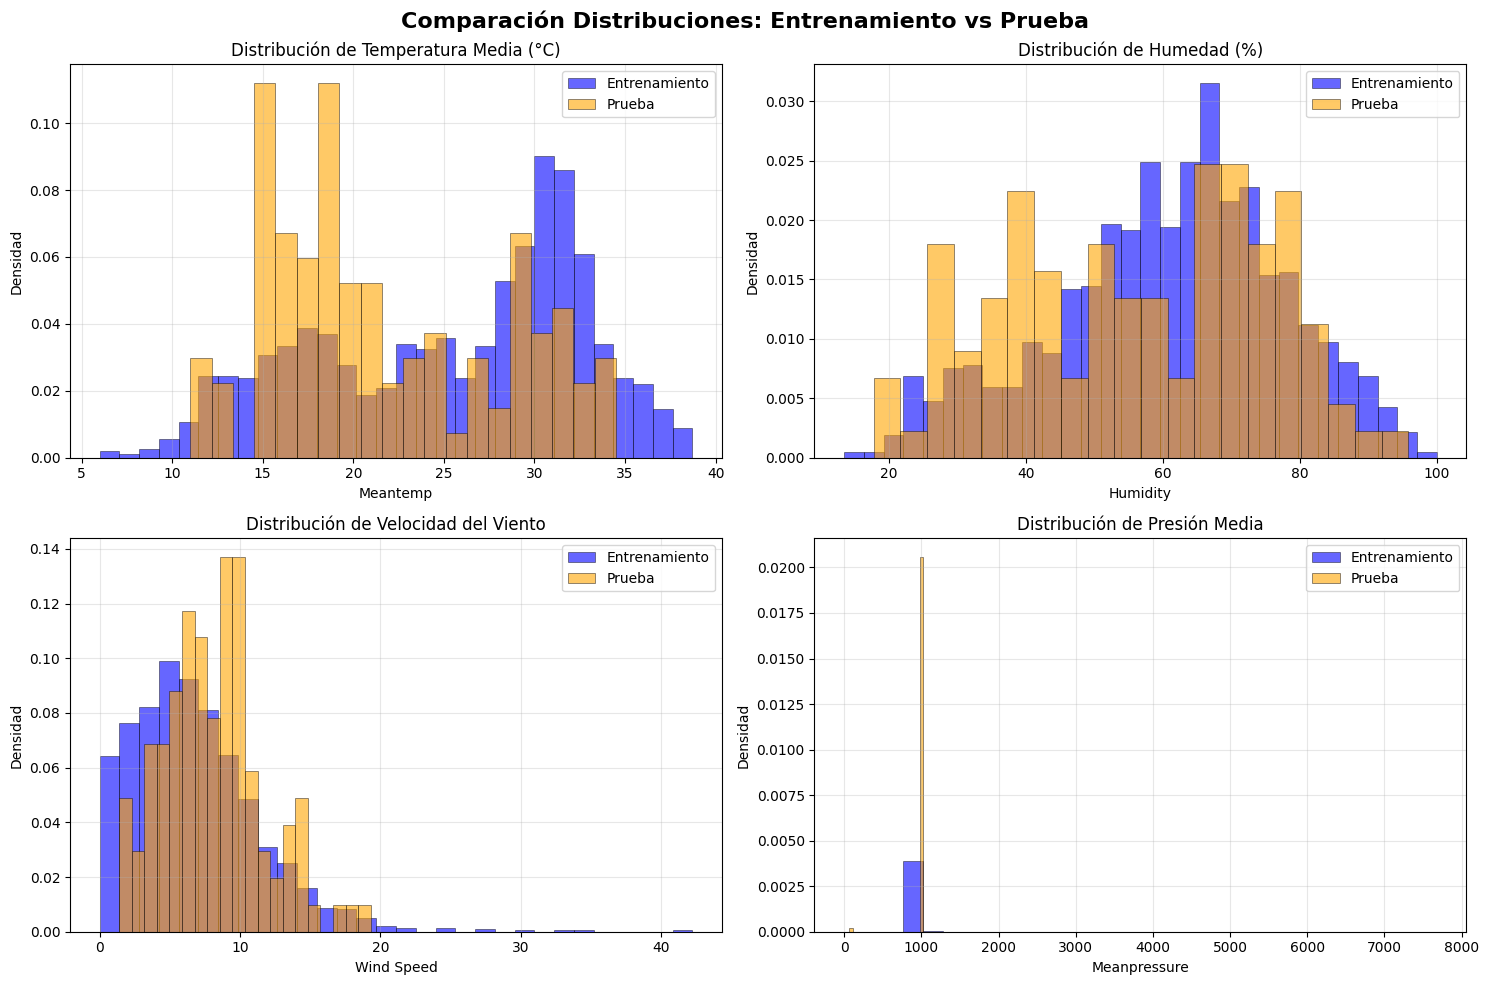

=== COMPARACIÓN ESTADÍSTICAS TRAIN vs TEST ===
       Variable  Train_Mean  Test_Mean  Train_Std  Test_Std  Mean_Diff  \
0      meantemp      25.496     21.713      7.348     6.360     -3.782   
1      humidity      60.772     56.258     16.770    19.068     -4.513   
2    wind_speed       6.802      8.144      4.562     3.588      1.342   
3  meanpressure    1011.105   1004.035    180.232    89.475     -7.069   

   Std_Diff  
0    -0.988  
1     2.298  
2    -0.974  
3   -90.757  


In [8]:
# Comparación de distribuciones entre train y test
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparación Distribuciones: Entrenamiento vs Prueba', fontsize=16, fontweight='bold')

for i, (var, title) in enumerate(zip(variables, titles)):
    row = i // 2
    col = i % 2
    
    # Histogramas superpuestos
    axes[row, col].hist(train_data[var], bins=30, alpha=0.6, label='Entrenamiento', 
                       color='blue', density=True, edgecolor='black', linewidth=0.5)
    axes[row, col].hist(test_data[var], bins=20, alpha=0.6, label='Prueba', 
                       color='orange', density=True, edgecolor='black', linewidth=0.5)
    
    axes[row, col].set_title(f'Distribución de {title}')
    axes[row, col].set_xlabel(var.replace('_', ' ').title())
    axes[row, col].set_ylabel('Densidad')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas comparativas
print("=== COMPARACIÓN ESTADÍSTICAS TRAIN vs TEST ===")
comparison_df = pd.DataFrame({
    'Variable': variables,
    'Train_Mean': [train_data[var].mean() for var in variables],
    'Test_Mean': [test_data[var].mean() for var in variables],
    'Train_Std': [train_data[var].std() for var in variables],
    'Test_Std': [test_data[var].std() for var in variables]
})

comparison_df['Mean_Diff'] = comparison_df['Test_Mean'] - comparison_df['Train_Mean']
comparison_df['Std_Diff'] = comparison_df['Test_Std'] - comparison_df['Train_Std']

print(comparison_df.round(3))

## 8. Resumen Visual de Insights

In [9]:
print("=== INSIGHTS PRINCIPALES DE LAS VISUALIZACIONES ===")
print("\n🌡️ TEMPERATURA:")
print(f"   • Rango: {train_data['meantemp'].min():.1f}°C a {train_data['meantemp'].max():.1f}°C")
print(f"   • Promedio: {train_data['meantemp'].mean():.1f}°C")
print(f"   • Patrones estacionales claramente visibles")

print("\n💧 HUMEDAD:")
print(f"   • Rango: {train_data['humidity'].min():.1f}% a {train_data['humidity'].max():.1f}%")
print(f"   • Promedio: {train_data['humidity'].mean():.1f}%")
print(f"   • Distribución relativamente uniforme")

print("\n🌪️ VIENTO:")
print(f"   • Rango: {train_data['wind_speed'].min():.1f} a {train_data['wind_speed'].max():.1f}")
print(f"   • Promedio: {train_data['wind_speed'].mean():.1f}")
print(f"   • Varios outliers de alta velocidad")

print("\n🌀 PRESIÓN:")
print(f"   • Rango: {train_data['meanpressure'].min():.1f} a {train_data['meanpressure'].max():.1f}")
print(f"   • Promedio: {train_data['meanpressure'].mean():.1f}")
print(f"   • Distribución normal con algunos outliers")

print("\n📊 CORRELACIONES:")
corr_pairs = []
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:
            corr_pairs.append(f"   • {variables[i]} - {variables[j]}: {corr_val:.3f}")

for pair in corr_pairs:
    print(pair)

print(f"\n🔍 CALIDAD DE DATOS:")
print(f"   • Datos faltantes: {train_data[variables].isnull().sum().sum()}")
print(f"   • Consistencia temporal: Datos diarios consecutivos")
print(f"   • Distribuciones train/test: Similares con ligeras variaciones")

=== INSIGHTS PRINCIPALES DE LAS VISUALIZACIONES ===

🌡️ TEMPERATURA:
   • Rango: 6.0°C a 38.7°C
   • Promedio: 25.5°C
   • Patrones estacionales claramente visibles

💧 HUMEDAD:
   • Rango: 13.4% a 100.0%
   • Promedio: 60.8%
   • Distribución relativamente uniforme

🌪️ VIENTO:
   • Rango: 0.0 a 42.2
   • Promedio: 6.8
   • Varios outliers de alta velocidad

🌀 PRESIÓN:
   • Rango: -3.0 a 7679.3
   • Promedio: 1011.1
   • Distribución normal con algunos outliers

📊 CORRELACIONES:
   • meantemp - humidity: -0.572
   • meantemp - wind_speed: 0.306
   • humidity - wind_speed: -0.374

🔍 CALIDAD DE DATOS:
   • Datos faltantes: 0
   • Consistencia temporal: Datos diarios consecutivos
   • Distribuciones train/test: Similares con ligeras variaciones
